# TRABAJO FINAL 

Alumno: Enzo Alexander Diaz Uribe 

Código: 20180242

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
path = "C:\@PUCP\COVID2021"
os.chdir(path)

In [43]:
plt.rcParams.update({'font.size': 17})

La base de datos utilizada fue extraida de los Datos Abiertos Minsa y Gestión del Conocimiento en Covid-19 

In [44]:
df_posi = pd.read_csv( "positivos_covid.csv", sep = ";" ,encoding = 'UTF-8')
df_fall = pd.read_csv("fallecidos_covid.csv", sep = ";" ,encoding = 'latin')

Se uso latin para que las palabras reconozcan la letra ñ. 

A continuación, se analizará la base de datos

In [45]:
df_fall.dtypes

FECHA_CORTE              int64
UUID                    object
FECHA_FALLECIMIENTO      int64
EDAD_DECLARADA           int64
SEXO                    object
FECHA_NAC              float64
DEPARTAMENTO            object
PROVINCIA               object
DISTRITO                object
dtype: object

In [46]:
df_posi.dtypes

FECHA_CORTE          int64
UUID                object
DEPARTAMENTO        object
PROVINCIA           object
DISTRITO            object
METODODX            object
EDAD               float64
SEXO                object
FECHA_RESULTADO    float64
dtype: object

Por lo que se puede obervar, existen 9 variables aquí 

Se continua con la limpia de la base de datos, solo se utilizará la base de datos de positivos covid 

In [47]:
df_posi.shape

(1533121, 9)

In [48]:
df_posi.isnull().sum(axis = 0)

FECHA_CORTE           0
UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD                322
SEXO                  1
FECHA_RESULTADO    2023
dtype: int64

In [49]:
df_posi = df_posi.dropna()

In [50]:
df_posi.isnull().sum(axis = 0)

FECHA_CORTE        0
UUID               0
DEPARTAMENTO       0
PROVINCIA          0
DISTRITO           0
METODODX           0
EDAD               0
SEXO               0
FECHA_RESULTADO    0
dtype: int64

De esta forma, se realizo la limpieza de la base con la eliminación de los missings como se pudo observar anteriormente.

## Gráfico 

En esta ocasión, el gráfico será de pie o redondo. 

Para poder realizar el gráfico como se quiere (de mujeres que dieron positivos en la prueba el 2021 a nivel departamental), se necesita realizar algunos cambios más a la base de datos de positivos. 

Los siguientes cambios no completamente necesarios, pero si se pueden hacerlos si se quiere continuar con un análisis más detallado 

In [51]:
df_posi["FECHA_RESULTADO"] = df_posi["FECHA_RESULTADO"].astype(int).astype(str)
df_posi["FECHA"] =  pd.to_datetime( df_posi["FECHA_RESULTADO"],
                                         format= '%Y%m%d', errors = "coerce")

In [52]:
df_posi["EDAD"] = df_posi["EDAD"].astype(int)

Se realizo lo siguiente para crear la dummy de la variable sexo 

In [53]:
df_posi = pd.get_dummies(df_posi, columns = ['METODODX',"SEXO"])

In [55]:
df_posi.dtypes

FECHA_CORTE                 int64
UUID                       object
DEPARTAMENTO               object
PROVINCIA                  object
DISTRITO                   object
EDAD                        int32
FECHA_RESULTADO            object
FECHA              datetime64[ns]
METODODX_AG                 uint8
METODODX_PCR                uint8
METODODX_PR                 uint8
SEXO_FEMENINO               uint8
SEXO_MASCULINO              uint8
dtype: object

In [57]:
df_posi_junto = df_posi.groupby(['DEPARTAMENTO']).agg( 
    {'METODODX_AG':['sum'],
     'METODODX_PCR':['sum'],
     'METODODX_PR':['sum'],
     'SEXO_FEMENINO':['sum'],
     'SEXO_MASCULINO' : ['sum']} )

df_posi_junto.columns = ["antigenos","molecular","prueba_rapida","femenino","masculino"]
df_posi_junto.reset_index(inplace=True)

In [58]:
df_posi_junto

,DEPARTAMENTO,antigenos,molecular,prueba_rapida,femenino,masculino
0,AMAZONAS,1658.0,3808.0,17595.0,12222.0,10839.0
1,ANCASH,12011.0,11718.0,26220.0,25185.0,24764.0
2,APURIMAC,2698.0,3377.0,7429.0,6727.0,6777.0
3,AREQUIPA,5674.0,14120.0,45386.0,30835.0,34345.0
4,AYACUCHO,3683.0,5054.0,13988.0,11515.0,11210.0
5,CAJAMARCA,4918.0,9891.0,25236.0,20211.0,19834.0
6,CALLAO,9378.0,25654.0,35152.0,33220.0,36964.0
7,CUSCO,8244.0,12632.0,22105.0,21017.0,21964.0
8,HUANCAVELICA,1491.0,1604.0,7644.0,5417.0,5322.0
9,HUANUCO,3189.0,3085.0,20321.0,13945.0,12650.0


Ahora, para solo contar con las mujeres de la lista y sin Lima, se realiza lo siguiente. 

In [59]:
condicion =(df_posi_junto["DEPARTAMENTO"] != "LIMA" )


df_posi_junto_f = df_posi_junto[ condicion ]
df_posi_dep = df_posi_junto_f.groupby(["DEPARTAMENTO"]).sum()
df_posi_dep.reset_index(inplace=True)

Solo con femenino

In [61]:
df_posi_dep["mujeres"] = df_posi_dep["femenino"]

Rankeamos a los departamentos por numero de infectados


In [63]:
df_posi_dep["rank"] = df_posi_dep["mujeres"].rank(ascending = False)

In [ ]:
Se corrige en función a los 10 primeros con mas infectados

In [65]:
df_posi_dep["DEPARTAMENTO_CORREGIDO"] = df_posi_dep.apply(lambda x: x["DEPARTAMENTO"] if x["rank"] < 10 else "OTROS",axis = 1 )

In [66]:
df_posi_dep2= df_posi_dep[["DEPARTAMENTO_CORREGIDO","mujeres"]].groupby("DEPARTAMENTO_CORREGIDO").sum().reset_index()

In [67]:
df_posi_dep2 = df_posi_dep2.sort_values(by=['mujeres'], ascending=False)

El código del gráfico a continuación 

In [69]:
x = df_posi_dep2["DEPARTAMENTO_CORREGIDO"]
y = df_posi_dep2["mujeres"]
explode = np.zeros( len(x) )
explode[0:2] = 0.1

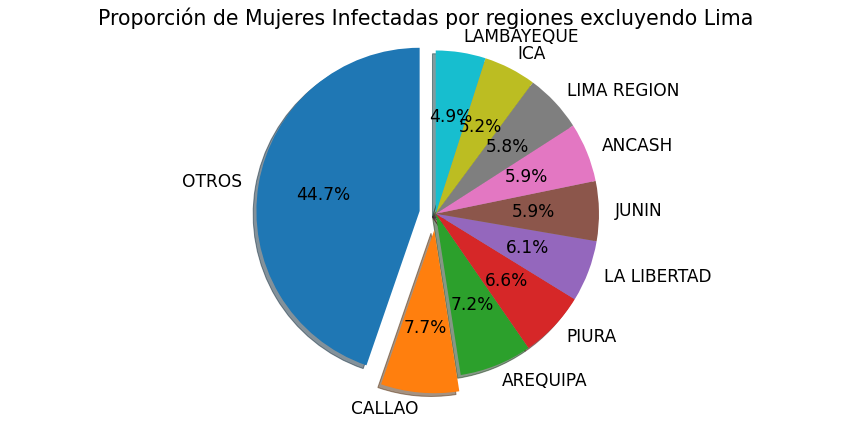

In [71]:
plt.rcParams["figure.figsize"] = (15,7)


fig, ax = plt.subplots()
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Proporción de Mujeres Infectadas por regiones excluyendo Lima")
plt.show()

fig.savefig('grafico_mujeres_departamental.jpg')